In [2]:
%matplotlib notebook

import DronePlotter
from py_drone_module import DronePlottable, DroneLogLoader
from SelectFilesButton import SelectFilesButton

from ipywidgets import interact, interactive
import ipywidgets as widgets

import time

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95vw !important; }</style>"))

filebutton = SelectFilesButton(initialdir='../DroneLogs')
filebutton

SelectFilesButton(description='Select log file', icon='square-o', style=ButtonStyle(button_color='orange'))

In [28]:
logfile = filebutton.file
originallog = DroneLogLoader(logfile)
print(originallog.getFirstFlyingIndex(), originallog.getFinalFlyingIndex(), len(originallog))

0 533 910


<IPython.core.display.Javascript object>


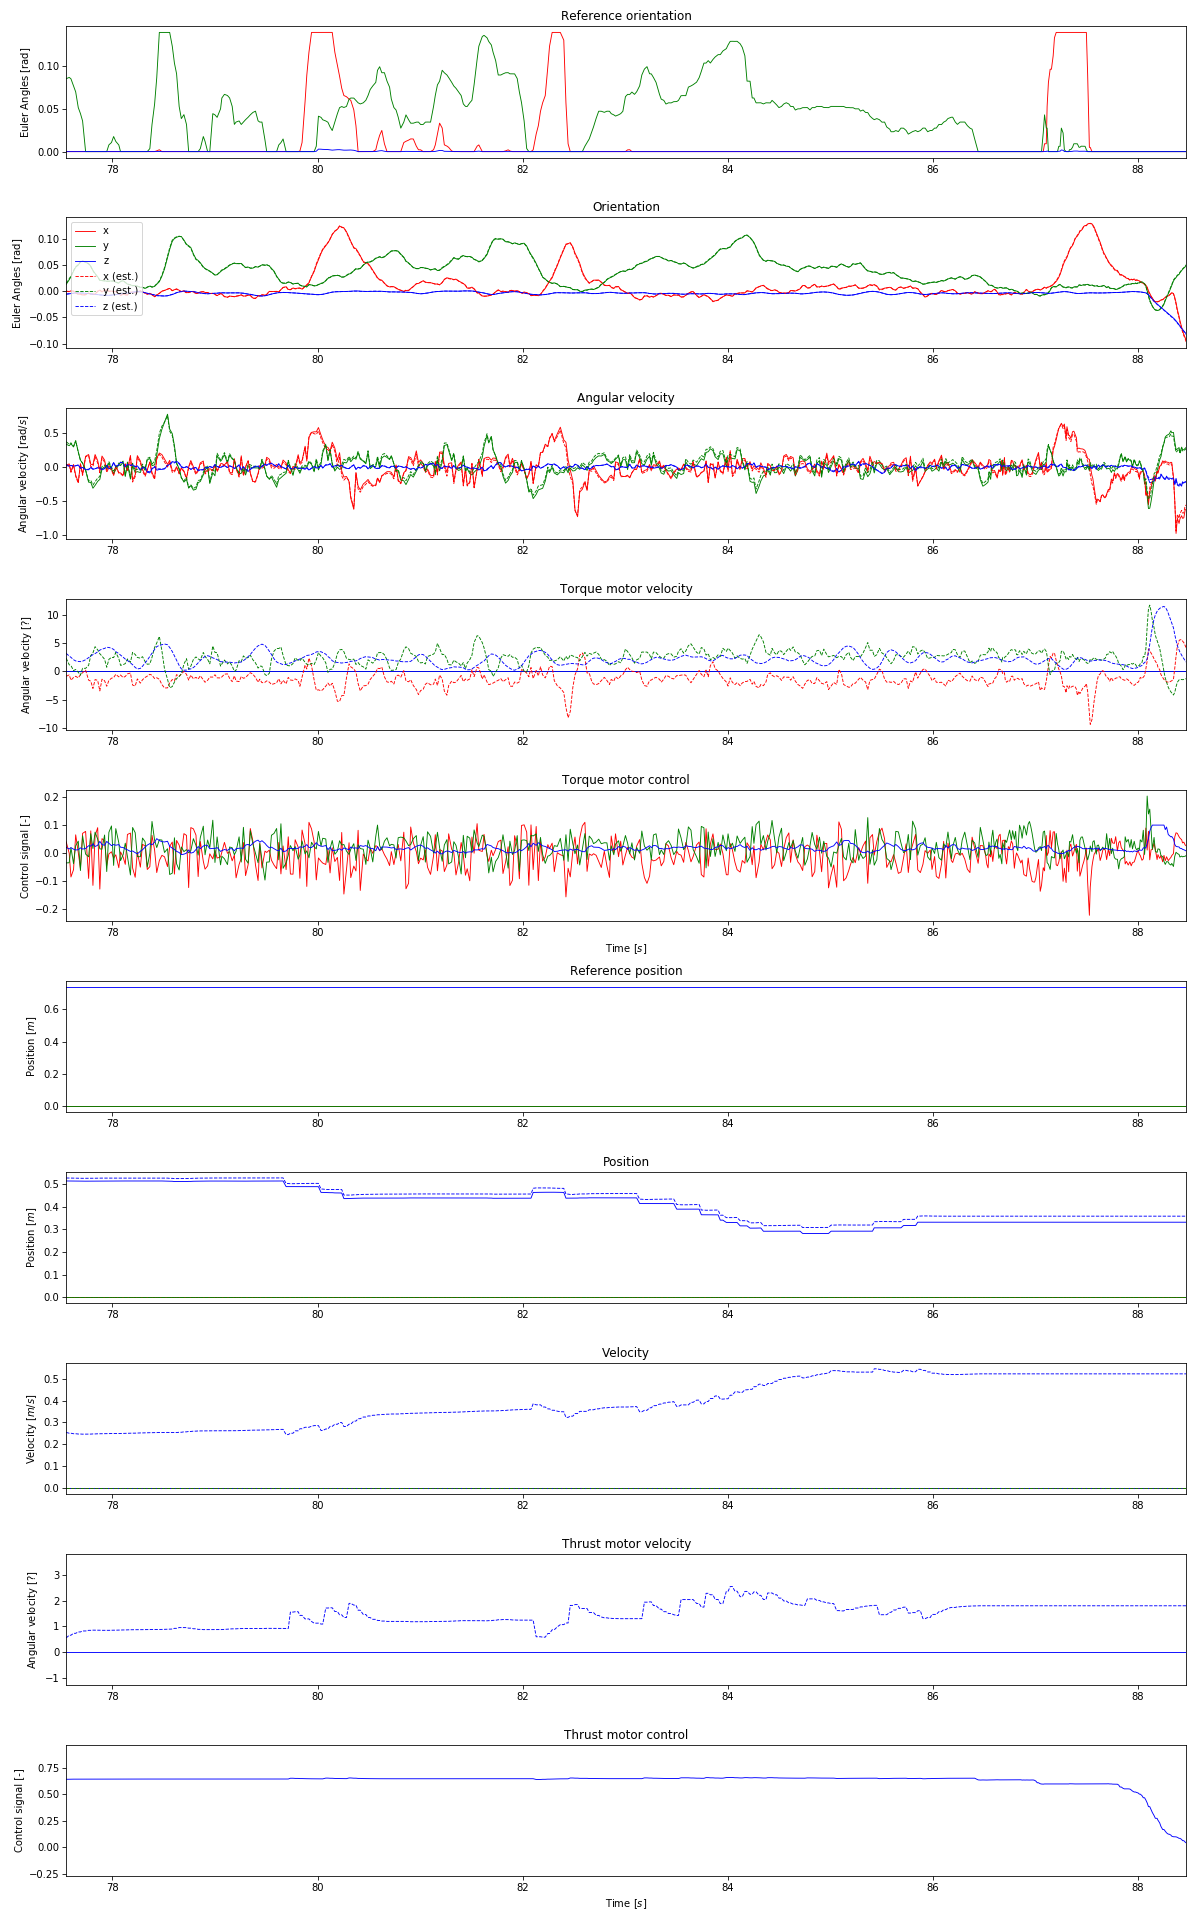

In [29]:
log = originallog.trim()
fig, lines = DronePlotter.plot(log, vertical=True, w=1500, h=800*3, marker='');

def update(**kwargs):
    start_time = time.time()
    try:
        DronePlotter.update_plot(lines, originallog.sliceTime(kwargs['t_start'], kwargs['t_end']))
    except IndexError:
        pass
    for ax in fig.axes:
        ax.set_xlim(kwargs['t_start'], kwargs['t_end'])
        ax.relim()
        ax.autoscale_view()
    fig.canvas.draw()
    end_time = time.time()
    print('Updating plot took {:.3f} ms'.format(
          (end_time - start_time)*1000.0))

def get_sliders():
    display(HTML("<style>.widget-hslider { width:70% !important; }</style>"))
    display(HTML("<style>.widget-inline-hbox .widget-label { width:20% !important; }</style>"))
    return interact(update, 
         t_start=widgets.FloatSlider(min=originallog.getStartTime(),max=originallog.getEndTime(),step=1,value=originallog.getFirstFlyingTime(),continuous_update=False,description='Start time [s]'),
         t_end=widgets.FloatSlider(min=originallog.getStartTime(),max=originallog.getEndTime(),step=1,value=originallog.getFinalFlyingTime(),continuous_update=False,description='Start time [s]'),);

In [25]:
get_sliders();

interactive(children=(FloatSlider(value=224.0750732421875, continuous_update=False, description='Start time [s…